In [205]:
## Importing the CSV and creation of a dataframe "poke_df"
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pokedata_imports import PokeTypeInfo

PATH_POKEDEX_CSV = "./pokedex/pokedex.csv"
poke_df = pd.read_csv(PATH_POKEDEX_CSV)
poke_df = poke_df.drop("Unnamed: 0", axis=1)

In [206]:
# Just a check if PokeTypeInfo class works
color_normal_type = PokeTypeInfo("Normal").type_colors()
print(color_normal_type)

#A8A77A


In [207]:
#1 Types are properties applied to Pokemon and their moves, which affect the power of moves in battes. (Bulbapedia)

## The 3 starter Pokemons (shown in STATS2 notebook) have Grass, Water and Fire as their Primary Types
## As of Gen 8, there are altotal 18 Pokemon types, with Fairy type being added in Gen 6

poke_types = poke_df["type_1"].unique()
print(poke_types)
print(f"\nNumber of Pokemon Types: {len(poke_types)}")

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']

Number of Pokemon Types: 18


In [208]:
#2 A Pokemon may have atmost two types: Primary and Secondary
## Secondary Type is optional, and could appear when a Pokemon evolves (also Mega Evolution)
## type_number attribute of poke_df denotes the number of types present in a Pokemon

poke_typenum = poke_df["type_number"].value_counts().reset_index()
poke_typenum

,type_number,count
0,2,542
1,1,486


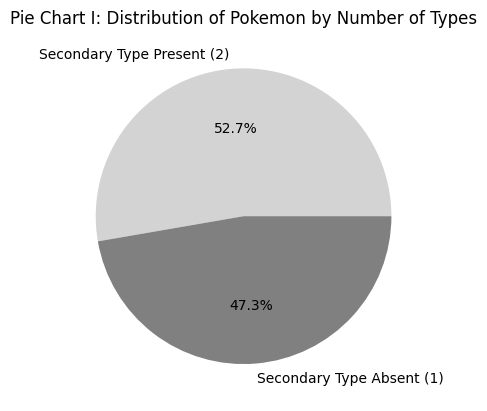

In [209]:
#2A Visualizing the Pokemon with Pie Chart
plt.pie(
    poke_typenum["count"],
    labels=["Secondary Type Present (2)", "Secondary Type Absent (1)"],
    colors=["lightgray", "gray"],
    autopct="%1.1f%%"
)
plt.title("Pie Chart I: Distribution of Pokemon by Number of Types")
plt.show()

In [210]:
#3 Distribution of Pokemon by their Types (both Primary & Secondary included)

type_count_primary = poke_df["type_1"].value_counts()
type_count_secondary = poke_df["type_2"].value_counts()
type_distribution = pd.concat(
    [type_count_primary, type_count_secondary],
    axis=1
)
type_distribution.columns = ["count_p", "count_s"]
# type_distribution["color"] = type_distribution.index.map(lambda x: PokeTypeInfo(x).type_colors())

type_distribution

,count_p,count_s
Water,134,19
Normal,115,11
Grass,91,26
Bug,81,9
Psychic,76,38
Fire,65,17
Electric,61,11
Rock,60,15
Dark,44,26
Ground,41,39


In [211]:
#3A Type Distribution for all types included (as a whole)
## Also adding hex-color to each Pokemon type
type_distribution_combined = (type_distribution["count_p"] + type_distribution["count_s"]).reset_index()
type_distribution_combined.columns = ["type", "tot_count"]
type_distribution_combined

,type,tot_count
0,Water,153
1,Normal,126
2,Grass,117
3,Bug,90
4,Psychic,114
5,Fire,82
6,Electric,72
7,Rock,75
8,Dark,70
9,Ground,80


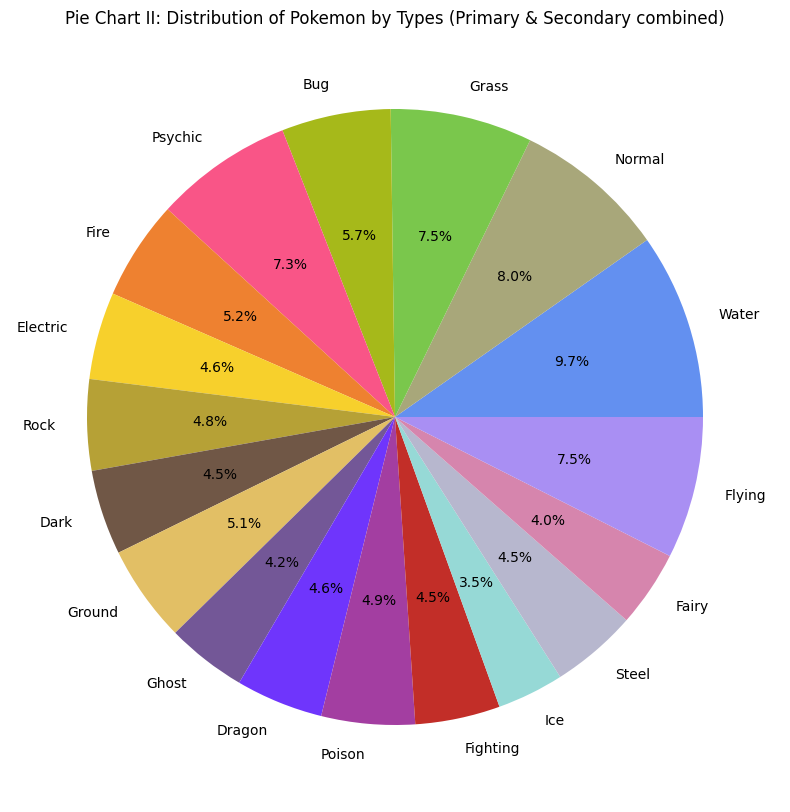

In [212]:
## Pie Chart for Type Distribution for Pokemon
plt.figure(figsize=(10, 10))
plt.pie(
    type_distribution_combined["tot_count"],
    labels = type_distribution_combined["type"],
    colors = type_distribution_combined["type"].apply(lambda x: PokeTypeInfo(x).type_colors()),
    autopct="%1.1f%%"
)
plt.title("Pie Chart II: Distribution of Pokemon by Types (Primary & Secondary combined)")
plt.show()